In [4]:
! pip install ucimlrepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset dari https://archive.ics.uci.edu/static/public/544/data.csv
df = 'https://archive.ics.uci.edu/static/public/544/data.csv'
df = pd.read_csv(df)

# Now you can use df.head()
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
# Print dataset information
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

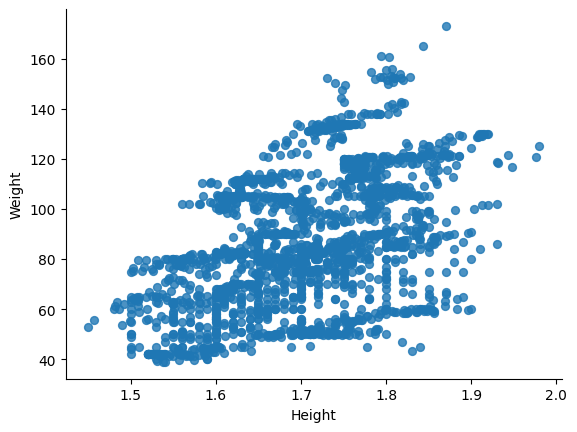

In [7]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Height', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

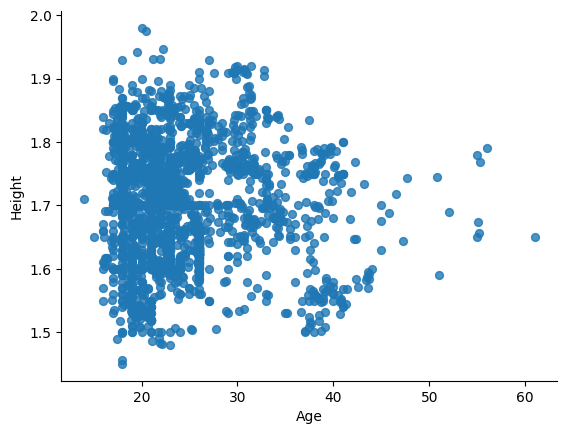

In [8]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

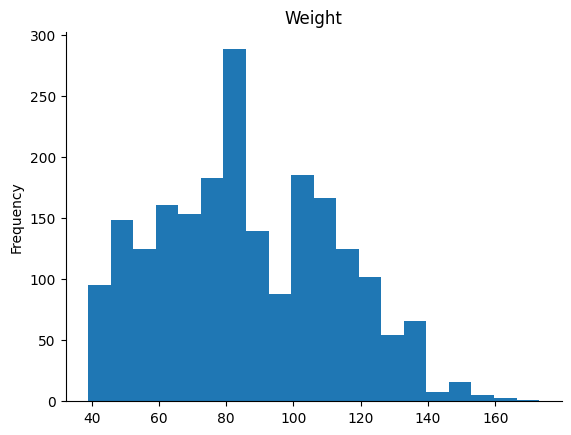

In [9]:
from matplotlib import pyplot as plt
df['Weight'].plot(kind='hist', bins=20, title='Weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

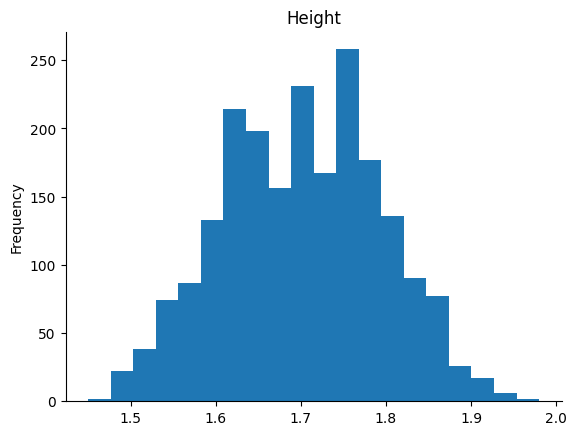

In [10]:
from matplotlib import pyplot as plt
df['Height'].plot(kind='hist', bins=20, title='Height')
plt.gca().spines[['top', 'right',]].set_visible(False)

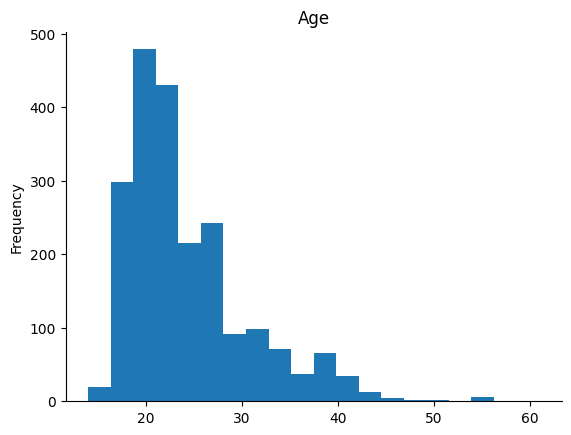

In [11]:
from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
# Check for Missing Values and their treatment

# Pra-pemrosesan Data
# Mengganti spasi pada nama kolom agar lebih mudah diakses
df.columns = df.columns.str.replace(' ', '_')

# Menghapus baris dengan nilai yang hilang (jika ada)
df.dropna(inplace=True)

# Mengonversi kolom kategorikal menjadi numerik dengan LabelEncoder
label_encoders = LabelEncoder()

# Copy the dataframe
df1 = df.copy(deep=True)
df1['NObeyesdad'] = label_encoders.fit_transform(df1['NObeyesdad'])

# Membulatkan nilai sesuai dengan permintaan
df1['Age'] = np.floor(df['Age']).astype(int)
df1['FCVC'] = df['FCVC'].round().astype(int)
df1['NCP'] = df['NCP'].round().astype(int)
df1['CH2O'] = df['CH2O'].round().astype(int)
df1['FAF'] = df['FAF'].round().astype(int)
df1['TUE'] = df['TUE'].round().astype(int)

# List of categorical columns (excluding 'NObeyesdad')
text_data_features = [i for i in df1.columns if df1[i].dtype == 'object' ]
print('Label Encoder Transformation')
for i in text_data_features:
    df1[i] = label_encoders.fit_transform(df1[i])
    print(i, ' : ', df1[i].unique(), ' = ', label_encoders.inverse_transform(df1[i].unique()))

# 3. Menyimpan Data yang Sudah Dibersihkan
cleaned_data_path = "cleaned_data.csv"
df1.to_csv(cleaned_data_path, index=False)

df1.info()
# print("Missing Values")
# df1.isna().sum()


Label Encoder Transformation
Gender  :  [0 1]  =  ['Female' 'Male']
family_history_with_overweight  :  [1 0]  =  ['yes' 'no']
FAVC  :  [0 1]  =  ['no' 'yes']
CAEC  :  [2 1 0 3]  =  ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE  :  [0 1]  =  ['no' 'yes']
SCC  :  [0 1]  =  ['no' 'yes']
CALC  :  [3 2 1 0]  =  ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS  :  [3 4 0 2 1]  =  ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad  :  [1 5 6 2 0 3 4]  =  ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int32  
 1   Age                             2111 non-null   int32  
 2   Height                   

In [13]:
data = 'cleaned_data.csv'
df = pd.read_csv(data)
df.head(590)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21,1.620000,64.000000,1,0,2,3,2,0,2,0,0,1,3,3,1
1,0,21,1.520000,56.000000,1,0,3,3,2,1,3,1,3,0,2,3,1
2,1,23,1.800000,77.000000,1,0,2,3,2,0,2,0,2,1,1,3,1
3,1,27,1.800000,87.000000,0,0,3,3,2,0,2,0,2,0,1,4,5
4,1,22,1.780000,89.800000,0,0,2,1,2,0,2,0,0,0,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,0,17,1.710756,50.000000,0,1,2,3,2,0,1,0,0,1,2,3,0
586,0,18,1.700000,50.000000,0,1,1,3,2,0,2,0,0,1,2,3,0
587,0,18,1.700000,50.000000,0,1,2,4,2,0,1,0,1,1,2,3,0
588,0,18,1.573816,39.850137,0,1,1,2,2,0,1,0,1,2,2,3,0


<Axes: >

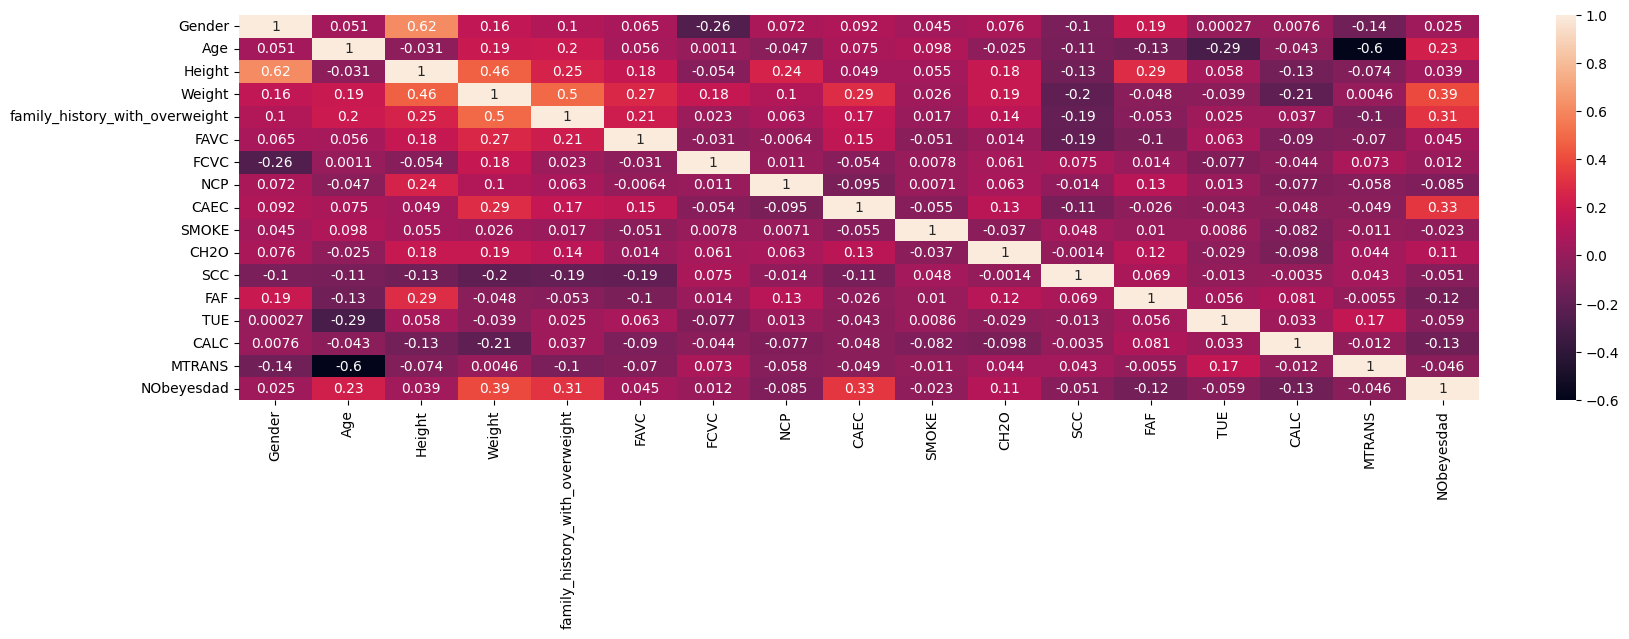

In [14]:
plt.figure(figsize = (20,5))
sns.heatmap(df.corr(), annot=True)

In [15]:
# 2. Pra-pemrosesan Data

# Memisahkan fitur (X) dan target (y)
X = df1.drop('NObeyesdad', axis=1)
y = df1['NObeyesdad']


In [16]:
# 3. Membagi Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [412]:
param_grid = {
    'n_estimators': [90, 95, 100, 105, 110, 115, 120, 125,],            # Number of trees in the forest
    'max_depth': [5, 7, 9, 10, 15, None],            # Maximum depth of each tree
    'min_samples_split': [2],            # Minimum number of samples required to split a node
    'min_samples_leaf': [2, 3, 4, 5, 6, 7],              # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt']            # Number of features to consider when looking for the best split
}

# Step 2: Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Step 3: Set up GridSearchCV with 5-fold cross-validation and refit=True
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                   # 3-fold cross-validation
    verbose=2,               # Print the process
    n_jobs=-1,               # Use all available cores for parallel processing
    refit=True               # Automatically refit on the best parameters
)

# Step 4: Fit the grid search model
grid_search.fit(X_train, y_train)  # Make sure you're using your train set here

# Step 5: Output the best parameters and best cross-validation score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Step 6: Retrain RandomForestClassifier with the best hyperparameters (this is done automatically with refit=True)
best_rf = grid_search.best_estimator_

# Step 7: Make predictions on the training data using the fitted best_rf
y_train_pred = best_rf.predict(X_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


                           Feature  Importance
3                           Weight    0.399784
2                           Height    0.129355
1                              Age    0.097174
0                           Gender    0.075017
6                             FCVC    0.041834
14                            CALC    0.037482
8                             CAEC    0.034335
7                              NCP    0.033277
4   family_history_with_overweight    0.032884
12                             FAF    0.026435
15                          MTRANS    0.025122
13                             TUE    0.022776
10                            CH2O    0.022097
5                             FAVC    0.016295
11                             SCC    0.004919
9                            SMOKE    0.001213


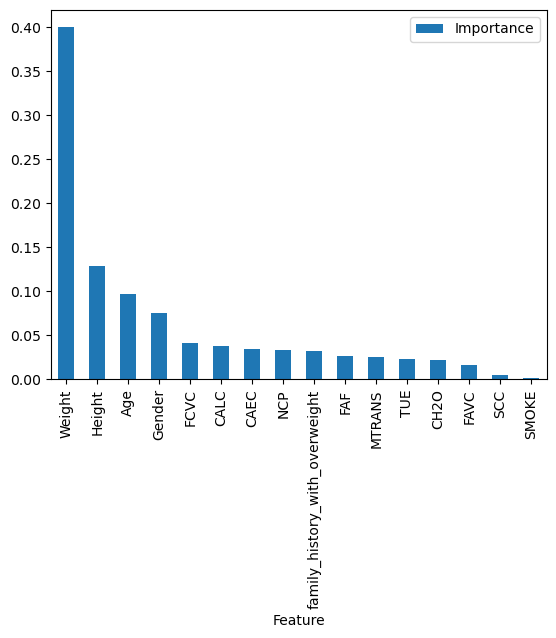

In [413]:
# Get feature importances
feature_importances = best_rf.feature_importances_

# Create a DataFrame for easy visualization
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_df)

# Optionally, plot the feature importances
feature_df.plot(kind='bar', x='Feature', y='Importance')
plt.show()

In [414]:
# 5. Evaluasi Model
y_pred = best_rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        56
           1       0.87      0.85      0.86        62
           2       0.99      0.94      0.96        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.86      0.89      0.88        56
           6       0.94      0.98      0.96        50

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423

Accuracy: 0.9432624113475178


In [416]:
# 6. Prediksi Baru
def predict_obesity(input_data):
    # Pastikan input sesuai dengan X.columns
    input_df = pd.DataFrame([input_data], columns=X.columns)
    
    # Prediksi
    prediction = best_rf.predict(input_df)
    
    # Decode hasil prediksi
    # prediction_label = label_encoders['NObeyesdad'].inverse_transform(prediction)  # Gunakan langsung label_encoder
    return prediction[0]

In [417]:
# Contoh Input untuk Prediksi
sample_input = {
    'Gender': 1,  # Female
    'Age': 21,
    'Height': 1.72,
    'Weight': 80,
    'family_history_with_overweight': 1,  # Yes
    'FAVC': 1,  # Yes
    'FCVC': 2,
    'NCP': 3,
    'CAEC': 1,  # Frequently
    'SMOKE': 0,  # No
    'CH2O': 2,
    'SCC': 1,  # Yes
    'FAF': 2,
    'TUE': 1,
    'CALC': 2,  # Sometimes
    'MTRANS': 3  # Public Transportation
}

prediction = predict_obesity(sample_input)
print("Predicted Obesity Level:", prediction)

Predicted Obesity Level: 6
